Prova ICA su un solo file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# NO ICA

In [ ]:
# carico un file .npz
data=np.load('/content/drive/MyDrive/eeg_DNN-Conti/eeg2/S01_AD.npz')

In [ ]:
list(data.keys())

['eeg']

In [ ]:
data['eeg']

array([[25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003],
       [25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003],
       [25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003],
       ...,
       [25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003],
       [25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003],
       [25.01354003, 25.01354003, 25.01354003, ..., 25.01354003,
        25.01354003, 25.01354003]])

In [ ]:
data['eeg'].shape

(16, 177280)

In [ ]:
data['eeg'].ndim

2

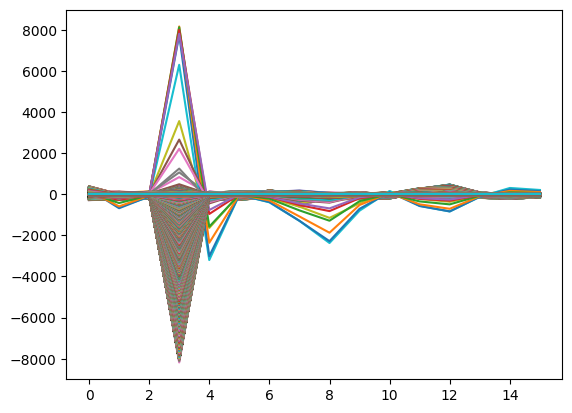

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['eeg'])
plt.show()

Segnale nel tempo

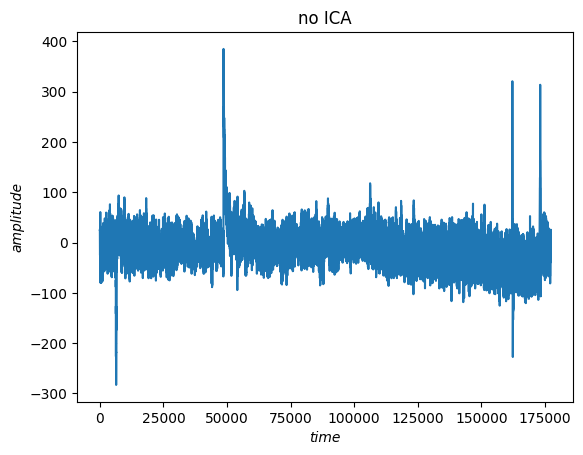

In [ ]:
fig1=plt.plot(data['eeg'][0])
plt.title("no ICA")
plt.xlabel('time', style='italic')
plt.ylabel('amplitude', style='italic')
plt.show()

Segnale in frequenza

In [ ]:
import scipy, matplotlib

# ICA

In [ ]:
import sklearn.decomposition

In [ ]:
# carico un file .npz
eeg=np.load('/content/drive/MyDrive/eeg_DNN-Conti/eeg2/S01_AD.npz')['eeg'].T

In [ ]:
eeg.shape

(177280, 16)

In [ ]:
transformer = sklearn.decomposition.FastICA(n_components=None,  algorithm='parallel', whiten='unit-variance',
                      fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None,
                      whiten_solver='svd', random_state=None)

In [ ]:
eeg_transformed = transformer.fit_transform(eeg)

In [ ]:
eeg_transformed.shape

(177280, 16)

In [ ]:
eeg_transformed.T.shape

(16, 177280)

In [ ]:
eeg_transformed_trasp=eeg_transformed.T

In [ ]:
eeg_transformed_trasp.shape

(16, 177280)

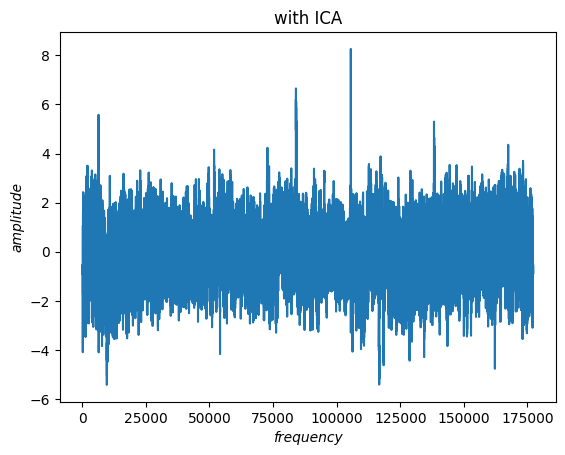

In [ ]:
fig2=plt.plot(eeg_transformed_trasp[0])
plt.title("with ICA")
plt.xlabel('frequency', style='italic')
plt.ylabel('amplitude', style='italic')
plt.show()

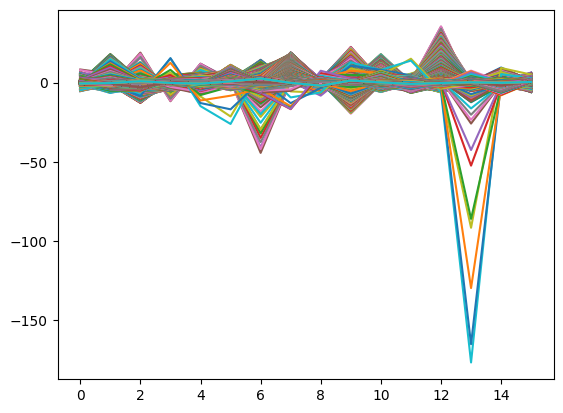

In [ ]:
plt.plot(eeg_transformed.T)
plt.show()

# CONFRONTO

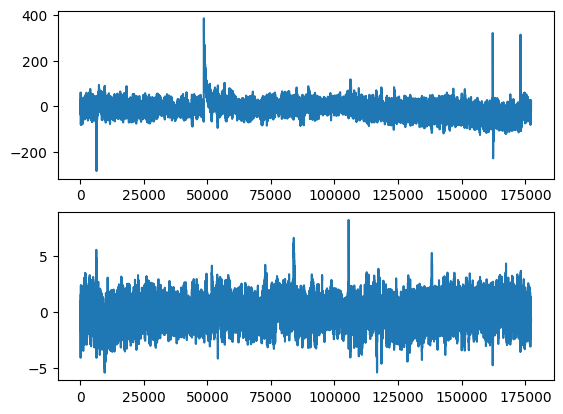

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(data['eeg'][0])
plt.title("Prima")

plt.subplot(212)
plt.plot(eeg_transformed_trasp[0])
plt.title("Dopo")


 ...]

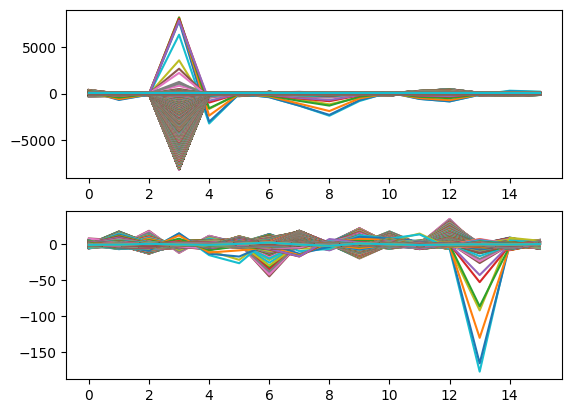

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(data['eeg'])
plt.subplot(212)
plt.plot(eeg_transformed.T)